In [7]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.model_selection import cross_val_score,GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.image import ImageDataGenerator

In [16]:
classifier=Sequential()
classifier.add(Conv2D(filters = 16, kernel_size=3, padding='same', input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(filters = 32, kernel_size=3, padding='same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(filters = 32, kernel_size=3, padding='same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(output_dim = 1024, init='uniform', activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(output_dim = 1, init='uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)             

D:\Functional Parts of software\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024, kernel_initializer="uniform")`
  if __name__ == '__main__':
D:\Functional Parts of software\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


In [17]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('dataset/training_set', target_size=(64, 64), batch_size=16, class_mode='binary')
test_set = test_datagen.flow_from_directory('dataset/test_set', target_size=(64, 64), batch_size=16, class_mode='binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [18]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = ,
                         validation_data = test_set,
                         validation_steps = 2000)

Epoch 1/25
8000/8000 [==============================] - 1045s 131ms/step - loss: 0.4591 - accuracy: 0.7713 - val_loss: 0.4590 - val_accuracy: 0.8085
Epoch 2/25
8000/8000 [==============================] - 1182s 148ms/step - loss: 0.2430 - accuracy: 0.8982 - val_loss: 0.2806 - val_accuracy: 0.8185
Epoch 3/25
8000/8000 [==============================] - 1157s 145ms/step - loss: 0.1242 - accuracy: 0.9531 - val_loss: 0.3685 - val_accuracy: 0.8170
Epoch 4/25
8000/8000 [==============================] - 1137s 142ms/step - loss: 0.0838 - accuracy: 0.9701 - val_loss: 1.6270 - val_accuracy: 0.8255
Epoch 5/25
8000/8000 [==============================] - 1135s 142ms/step - loss: 0.0671 - accuracy: 0.9762 - val_loss: 2.1620 - val_accuracy: 0.8160
Epoch 6/25
8000/8000 [==============================] - 1137s 142ms/step - loss: 0.0598 - accuracy: 0.9800 - val_loss: 1.7046 - val_accuracy: 0.8335
Epoch 7/25
8000/8000 [==============================] - 958s 120ms/step - loss: 0.0572 - accuracy: 0.9810 

KeyboardInterrupt: 

In [15]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4590702212257559197
]


In [21]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [19]:
classifier.evaluate(test_set)


125/125 [==============================] - 5s 40ms/step


[2.749969005584717, 0.8339999914169312]

dog


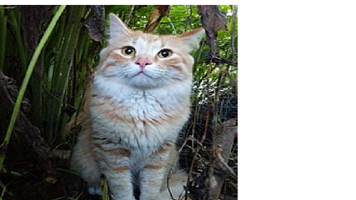

In [145]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
img=Image.open('dataset/single_prediction/c.jpg')
img.thumbnail((360, 200))
test_image = image.load_img('dataset/single_prediction/c.jpg',target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image= np.expand_dims(test_image, axis=0)
result=classifier.predict(test_image)
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction ='cat'
print(prediction)
img

In [77]:
test_image= np.expand_dims(test_image, axis=0)
result=classifier.predict(test_image)

In [78]:
test_image.shape

(1, 64, 64, 3)

In [79]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [80]:
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction ='cat'
prediction

'dog'